# Inaugural Project - Codenomics Crew

Imports and set magics:

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

results = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup
We consider the economy descriped in the 'InauguralProject2024.pdf' file.  
We will not be restating the equations, but they can be found along with our solutions.

# Question 1

We are told, that the initial endowment is:
$$\omega_1^A=0.8$$
$$\omega_2^A=0.3$$

Illustrating the set (i.e. all the Pareto improvements relative to the endowment) in the Edgeworth box

In [49]:
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

N = 75
x_grid = np.linspace(0,1,N+1)



# Calculate initial utilities:
u_A_initial = model.utility_A(par.w1A, par.w2A)
u_B_initial = model.utility_B(par.w1B, par.w2B)

pareto_improvement = [] #Initialise empty list to store pareto improvements

# Iterate through redistributions
for x1A in x_grid:
    for x2A in x_grid:

        # Ensure total endowment of each good is 1
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        u_A = x1A**par.alpha * x2A**(1-par.alpha)
        u_B = x1B**par.beta * x2B**(1-par.beta)

        # Check for Pareto improvement
        if u_A > u_A_initial and u_B > u_B_initial:
            pareto_improvement.append((np.array([x1A, x2A]), np.array([x1B, x2B])))

# Optional printing option (uncomment to print):
# for allocation in pareto_improvement:
#    print("Consumer A's allocation:",allocation[0], "| Consumer B's allocation:", allocation[1])

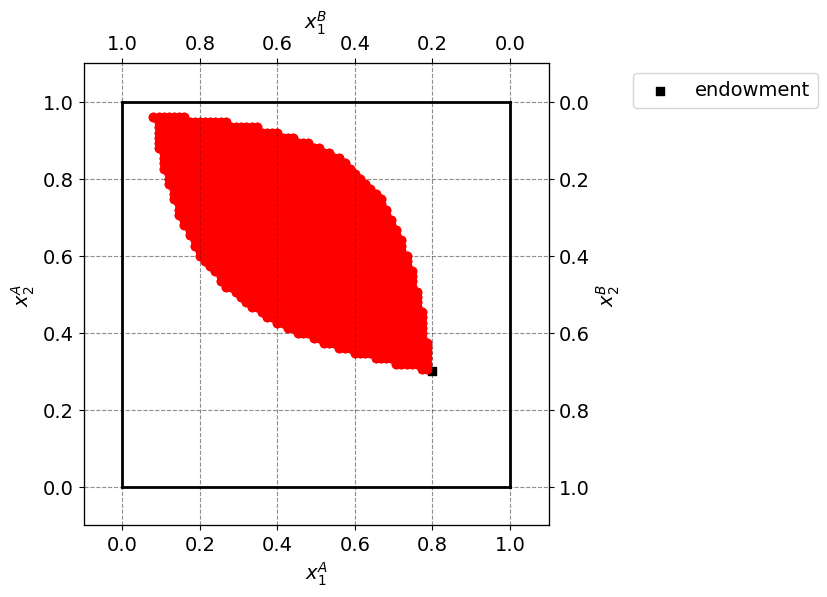

In [50]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
for allocation in pareto_improvement:
    ax_A.scatter(allocation[0][0], allocation[0][1], marker='o', color='red')
    ax_B.scatter(allocation[1][0], allocation[1][1], marker='o', color='red')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Calculating the error in the market clearing conditions for each price in the price-set $P_1$

In [51]:
par = model.par
P1 = np.linspace(0.5,2.5,N+1)  #Defines the set of prices

eps1 = []   # Empty list to store ε1
eps2 = []   # Empty list to store ε2
p_1 = []    # Empty list to store prices corresponding to the errors

for p1 in P1:   
#Loops through every price and calculates demand for each consumer and the error

    demandA1, demandA2 = model.demand_A(p1)     #Calculates demand for good 1 and good 2 for consumer A
    demandB1, demandB2 = model.demand_B(p1)     #Calculates demand for good 1 and good 2 for consumer B

    eps1.append(demandA1-par.w1A+demandB1-par.w1B)   #Adds the error to the list "eps1"
    eps2.append(demandA2-par.w2A+demandB2-par.w2B)   #Adds the error to the list "eps2"
    p_1.append(p1)                                   #Stores the corresponding price in "p_1"                                          #Stores the price used for calculating the two errors

    
for price, error1, error2 in zip(p_1, eps1, eps2):
    sign1 = '+' if error1 >= 0 else '-'  # Determine sign for error1
    sign2 = '+' if error2 >= 0 else '-'  # Determine sign for error2
    
    print(f"For price = {price:.2f} ---> epsilon1 = {sign1}{abs(error1):.4f}\t and epsilon2 = {sign2}{abs(error2):.4f}")


For price = 0.50 ---> epsilon1 = +0.5333	 and epsilon2 = -0.2667
For price = 0.53 ---> epsilon1 = +0.4759	 and epsilon2 = -0.2507
For price = 0.55 ---> epsilon1 = +0.4241	 and epsilon2 = -0.2347
For price = 0.58 ---> epsilon1 = +0.3770	 and epsilon2 = -0.2187
For price = 0.61 ---> epsilon1 = +0.3341	 and epsilon2 = -0.2027
For price = 0.63 ---> epsilon1 = +0.2947	 and epsilon2 = -0.1867
For price = 0.66 ---> epsilon1 = +0.2586	 and epsilon2 = -0.1707
For price = 0.69 ---> epsilon1 = +0.2252	 and epsilon2 = -0.1547
For price = 0.71 ---> epsilon1 = +0.1944	 and epsilon2 = -0.1387
For price = 0.74 ---> epsilon1 = +0.1658	 and epsilon2 = -0.1227
For price = 0.77 ---> epsilon1 = +0.1391	 and epsilon2 = -0.1067
For price = 0.79 ---> epsilon1 = +0.1143	 and epsilon2 = -0.0907
For price = 0.82 ---> epsilon1 = +0.0911	 and epsilon2 = -0.0747
For price = 0.85 ---> epsilon1 = +0.0693	 and epsilon2 = -0.0587
For price = 0.87 ---> epsilon1 = +0.0489	 and epsilon2 = -0.0427
For price = 0.90 ---> eps

Below the errors are plotted as functions of the price

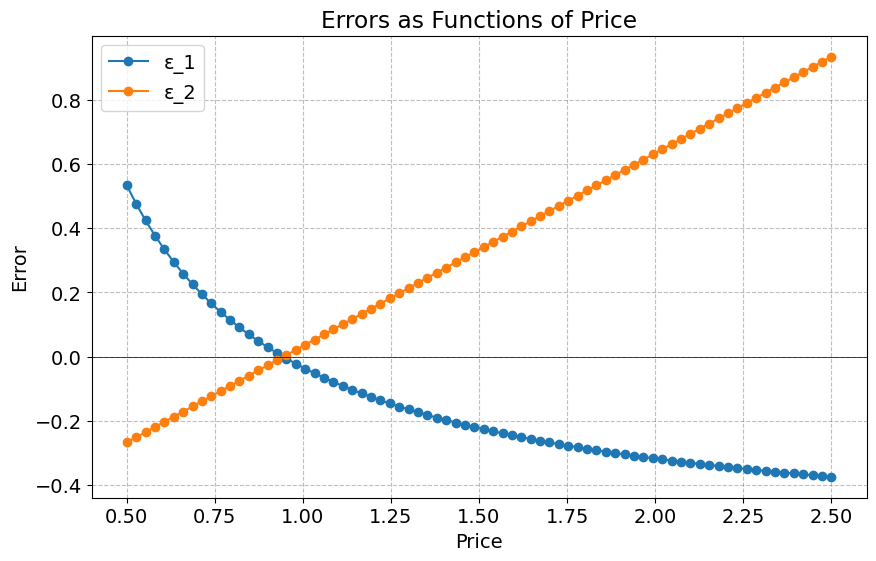

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(p_1, eps1, label='ε_1', marker='o')
plt.plot(p_1, eps2, label='ε_2', marker='o')
plt.xlabel('Price')
plt.ylabel('Error')
plt.title('Errors as Functions of Price')
plt.axhline(0, color='black', linewidth=0.5)  # Adding horizontal line at y=0
plt.legend()
plt.grid(True)
plt.show()

We see that both the errors are 0 at a price for good 1 of just below 1

# Question 3

Finding the market clearing price.  
Because of Walras' law, we only need to focus on clearing in the market of good 1.

In [53]:
p1_guess = 1.5
p2 = 1
model.find_equilibrium(p1_guess,p2)

  0: p1 =   1.00000000 -> excess demand ->    -0.03333333
  1: p1 =   0.99833333 -> excess demand ->    -0.03238731
  2: p1 =   0.99671397 -> excess demand ->    -0.03146511
  3: p1 =   0.99514071 -> excess demand ->    -0.03056629
  4: p1 =   0.99361240 -> excess demand ->    -0.02969042
   ...
 25: p1 =   0.97005748 -> excess demand ->    -0.01584217
 50: p1 =   0.95604916 -> excess demand ->    -0.00728292
 75: p1 =   0.94965869 -> excess demand ->    -0.00329439
100: p1 =   0.94677835 -> excess demand ->    -0.00147906
125: p1 =   0.94548729 -> excess demand ->    -0.00066178
150: p1 =   0.94491005 -> excess demand ->    -0.00029565
175: p1 =   0.94465225 -> excess demand ->    -0.00013199
200: p1 =   0.94453718 -> excess demand ->    -0.00005891
225: p1 =   0.94448582 -> excess demand ->    -0.00002629
250: p1 =   0.94446291 -> excess demand ->    -0.00001173
275: p1 =   0.94445268 -> excess demand ->    -0.00000523
300: p1 =   0.94444812 -> excess demand ->    -0.00000234
325: p1

In [54]:
model.print_solution()

Solution to market equilibrium:
p1 = 0.944444460153369

Excess demands are:
Z1 = -9.979787329861267e-09
Z2 = 9.425354940972852e-09


In [55]:
#Storing the solutions:

optimal_price = model.p1_star
x1A, x2A = model.demand_A(model.p1_star)[0], model.demand_A(model.p1_star)[1]
x1B, x2B = model.demand_B(model.p1_star)[0], model.demand_B(model.p1_star)[1]
max_utility = model.utility_A(x1A, x2A)
x1A_allocation = x1A
x2A_allocation = x2A
x1B_allocation = x1B
x2B_allocation = x2B


iteration_3_results = {
    "Optimal Price for Consumer A": optimal_price,
    "Maximum Utility of Consumer A": max_utility,
    "Allocation of x1A": x1A_allocation,
    "Allocation of x2A": x2A_allocation,
    "Allocation of x1B": x1B_allocation,
    "Allocation of x2B": x2B_allocation
}
results.append(iteration_3_results)

# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)

Optimal Price for Consumer A: 0.944444460153369
Maximum Utility of Consumer A: 0.5692735890636648

Allocation of goods for Consumer A:
  Good 1: 0.37254901784670424
  Good 2: 0.7037037120817969

Allocation of goods for Consumer B:
  Good 1: 0.6274509721735084
  Good 2: 0.29629629734355795


# Question 4

We now assume that consumer A will chose a price that maximizes her own utility.

In [56]:
# 4.a: Consumer A now chooses a price in P1

# Define the number of price points
N = 75
prices = np.linspace(0.5, 2.5, N+1)

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan


for price in prices:
    
    # Calculate consumer A's utility at the equilibrium
    # We first calculate consumer B's demand, since they will react to whatever price A sets
    x1B, x2B = model.demand_B(price)[0], model.demand_B(price)[1]

    x1A = 1-x1B     # Ensures market clearing
    x2A = 1-x2B     # Ensures market clearing

    
    utility_A = model.utility_A(x1A, x2A)
    
    # Check if this price yields higher utility
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_price = price
        x1A_allocation = x1A
        x2A_allocation = x2A
        x1B_allocation = x1B
        x2B_allocation = x2B

iteration_4a_results = {
    "Optimal Price for Consumer A": optimal_price,
    "Maximum Utility of Consumer A": max_utility,
    "Allocation of x1A": x1A_allocation,
    "Allocation of x2A": x2A_allocation,
    "Allocation of x1B": x1B_allocation,
    "Allocation of x2B": x2B_allocation
}
results.append(iteration_4a_results)


# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for Consumer A: 1.8866666666666667
Maximum Utility of Consumer A: 0.633615985237553

Allocation of goods for Consumer A:
  Good 1: 0.619316843345112
  Good 2: 0.6408888888888888

Allocation of goods for Consumer B:
  Good 1: 0.380683156654888
  Good 2: 0.3591111111111111


c:\Users\rasmu\OneDrive\KU - Økonomi\Introduction to Programming and Numerical Analysis\Project\projects-2024-codeonomics-crew\inauguralproject\inauguralproject.py:44: RuntimeWarning: invalid value encountered in scalar power
  u_A = x1A**(par.alpha) * x2A**(1-par.alpha)


In [57]:
# 4.b: Now consumer A can choose ALL positive values


# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan


for price in np.arange(0.1, 100, 0.0001):
    
    # Calculate consumer A's utility at the equilibrium
    x1B, x2B = model.demand_B(price)[0], model.demand_B(price)[1]

    x1A = 1 - x1B
    x2A = 1 - x2B

    if x1A <= 1 and x2A <= 1 :
        utility_A = model.utility_A(x1A, x2A)
    
    # Check if this price yields higher utility
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_price = price
            x1A_allocation = x1A
            x2A_allocation = x2A
            x1B_allocation = x1B
            x2B_allocation = x2B

iteration_4b_results = {
    "Optimal Price for Consumer A": optimal_price,
    "Maximum Utility of Consumer A": max_utility,
    "Allocation of x1A": x1A_allocation,
    "Allocation of x2A": x2A_allocation,
    "Allocation of x1B": x1B_allocation,
    "Allocation of x2B": x2B_allocation
}
results.append(iteration_4b_results)

# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for Consumer A: 1.8993000000000517
Maximum Utility of Consumer A: 0.633620850629308

Allocation of goods for Consumer A:
  Good 1: 0.6209621088471259
  Good 2: 0.6400466666666632

Allocation of goods for Consumer B:
  Good 1: 0.3790378911528741
  Good 2: 0.3599533333333368


# Question 5

We now assume that A can choose B's consumption directly, but that A still has to ensure, that B is no worse off.

In [58]:
# 5.a: 

par = model.par

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan



for x1 in x_grid:
    for x2 in x_grid:
        utility_A = model.utility_A(x1, x2)
        utility_B = model.utility_B(1-x1, 1-x2)

        # Calculate price (only used to the print)
        price = par.alpha*par.w2A/(x1-par.alpha*par.w1A)

        if utility_A > max_utility and utility_B >= u_B_initial:
            max_utility = utility_A
            optimal_price = price
            x1A_allocation = x1
            x2A_allocation = x2
            x1B_allocation = 1-x1
            x2B_allocation = 1-x2

iteration_5a_results = {
    "Optimal Price for Consumer A": optimal_price,
    "Maximum Utility of Consumer A": max_utility,
    "Allocation of x1A": x1A_allocation,
    "Allocation of x2A": x2A_allocation,
    "Allocation of x1B": x1B_allocation,
    "Allocation of x2B": x2B_allocation
}
results.append(iteration_5a_results)

# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for Consumer A: 0.34090909090909083
Maximum Utility of Consumer A: 0.7415523509091093

Allocation of goods for Consumer A:
  Good 1: 0.56
  Good 2: 0.8533333333333334

Allocation of goods for Consumer B:
  Good 1: 0.43999999999999995
  Good 2: 0.1466666666666666


C:\Users\rasmu\AppData\Local\Temp\ipykernel_9508\1438847718.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  price = par.alpha*par.w2A/(x1-par.alpha*par.w1A)


In [59]:
# 5.b: Now consumer A can choose ALL positive values

# Calculate consumer A's utility 
def util_pareto(x):

    if 1 < x[0] < 0 or 1 < x[1] < 0:
        return 0

    return -model.utility_A(x[0], x[1])

constraint = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - u_B_initial})
bounds = ( (0,1) , (0,1) )

# Initialize variables to store maximum utility and corresponding price
optimal = optimize.minimize(util_pareto, constraints=constraint, method='SLSQP',x0=[0.5,0.5],bounds=bounds)

x1A_allocation = optimal.x[0]
x2A_allocation = optimal.x[1]
x1B_allocation = 1 - optimal.x[0]
x2B_allocation = 1 - optimal.x[1]

price = par.alpha*par.w2A/(optimal.x[0]-par.alpha*par.w1A)

iteration_5b_results = {
    "Optimal Price for Consumer A": optimal_price,
    "Maximum Utility of Consumer A": max_utility,
    "Allocation of x1A": x1A_allocation,
    "Allocation of x2A": x2A_allocation,
    "Allocation of x1B": x1B_allocation,
    "Allocation of x2B": x2B_allocation
}
results.append(iteration_5b_results)

# Print the optimal price and maximum utility
print("Optimal Price:", price)
print("Maximum Utility of Consumer A:", model.utility_A(optimal.x[0], optimal.x[1]))
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)

Optimal Price: 0.24142687329513435
Maximum Utility of Consumer A: 0.7100258610697728

Allocation of goods for Consumer A:
  Good 1: 0.6808707634813329
  Good 2: 0.7250682826336569

Allocation of goods for Consumer B:
  Good 1: 0.3191292365186671
  Good 2: 0.27493171736634314


# Question 6

In [60]:
# 6.a:

par = model.par

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan


for price in np.arange(0.1, 100, 0.0001):
    
    # Calculate consumer A's utility at the equilibrium
    x1A, x2A = model.demand_A(price)[0], model.demand_A(price)[1]
    utility_A = model.utility_A(x1A, x2A)
    utility_B = model.utility_B(1-x1A, 1-x2A)
    utility = utility_A + utility_B
    
    # Check if this price yields higher utility
    if utility > max_utility and u_A_initial <= utility_A and u_B_initial <= utility_B:
        max_utility = utility
        optimal_price = price
        x1A_allocation = x1A
        x2A_allocation = x2A
        x1B_allocation = 1-x1A
        x2B_allocation = 1-x2A


# iteration_6_results = {
#     "Optimal Price for Consumer A": optimal_price,
#     "Maximum Utility of Consumer A": max_utility,
#     "Allocation of x1A": x1A_allocation,
#     "Allocation of x2A": x2A_allocation,
#     "Allocation of x1B": x1B_allocation,
#     "Allocation of x2B": x2B_allocation
# }
# results.append(iteration_6_results)

# Print the optimal price and maximum utility
print("Optimal Price for good 1:", optimal_price)
print("Maximum Utility:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


c:\Users\rasmu\OneDrive\KU - Økonomi\Introduction to Programming and Numerical Analysis\Project\projects-2024-codeonomics-crew\inauguralproject\inauguralproject.py:62: RuntimeWarning: invalid value encountered in scalar power
  u_B = x1B**par.beta * x2B**(1-par.beta)


Optimal Price for good 1: 0.936600000000024
Maximum Utility: 1.0579004424668461

Allocation of goods for Consumer A:
  Good 1: 0.3734358317317931
  Good 2: 0.6995200000000129

Allocation of goods for Consumer B:
  Good 1: 0.6265641682682068
  Good 2: 0.3004799999999871


In [61]:
# 6.a: Maximizing joint utility

par = model.par

# Calculate summed utility 
def util_planner(x):

    if 1 < x[0] < 0 or 1 < x[1] < 0:
        return 0

    return - ( model.utility_A(x[0], x[1]) + model.utility_B(1-x[0], 1-x[1]))

constraint = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - u_B_initial})
bounds = ( (0,1) , (0,1) )

# Initialize variables to store maximum utility and corresponding price
optimal = optimize.minimize(util_planner, constraints=constraint, method='SLSQP',x0=[0.5,0.5],bounds=bounds)

x1A_allocation = optimal.x[0]
x2A_allocation = optimal.x[1]
x1B_allocation = 1 - optimal.x[0]
x2B_allocation = 1 - optimal.x[1]

max_utility = model.utility_A(optimal.x[0], optimal.x[1])

price = par.alpha*par.w2A/(optimal.x[0]-par.alpha*par.w1A)

iteration_6a_results = {
    "Optimal Price for Consumer A": optimal_price,
    "Maximum Utility of Consumer A": max_utility,
    "Allocation of x1A": x1A_allocation,
    "Allocation of x2A": x2A_allocation,
    "Allocation of x1B": x1B_allocation,
    "Allocation of x2B": x2B_allocation
}
results.append(iteration_6a_results)

# Print the optimal price and maximum utility
print("Optimal Price:", price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)

Optimal Price: 1.4982396850705277
Maximum Utility of Consumer A: 0.5291336663821624

Allocation of goods for Consumer A:
  Good 1: 0.33341166147388446
  Good 2: 0.6665883190561481

Allocation of goods for Consumer B:
  Good 1: 0.6665883385261155
  Good 2: 0.3334116809438519


In [62]:
#6.b:

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results)

# Rename the indexes
index_labels = ['3', '4a', '4b', '5a', '5b', '6a'] 
df.index = index_labels
df_rounded = df.round(3)

# Print the DataFrame
df_rounded

,Optimal Price for Consumer A,Maximum Utility of Consumer A,Allocation of x1A,Allocation of x2A,Allocation of x1B,Allocation of x2B
3,0.944,0.569,0.373,0.704,0.627,0.296
4a,1.887,0.634,0.619,0.641,0.381,0.359
4b,1.899,0.634,0.621,0.640,0.379,0.360
5a,0.341,0.742,0.560,0.853,0.440,0.147
5b,0.341,0.742,0.681,0.725,0.319,0.275
6a,0.937,0.529,0.333,0.667,0.667,0.333


In [63]:
# Initialize an empty list to store only the allocations
allocations_list = []

# Iterate over each dictionary in 'results'
for result in results:
    # Extract the allocation data from the dictionary and append it to 'allocations_list'
    allocations_list.append([
        result["Allocation of x1A"],
        result["Allocation of x2A"]
    ])

# 'allocations_list' now contains only the allocations for each iteration

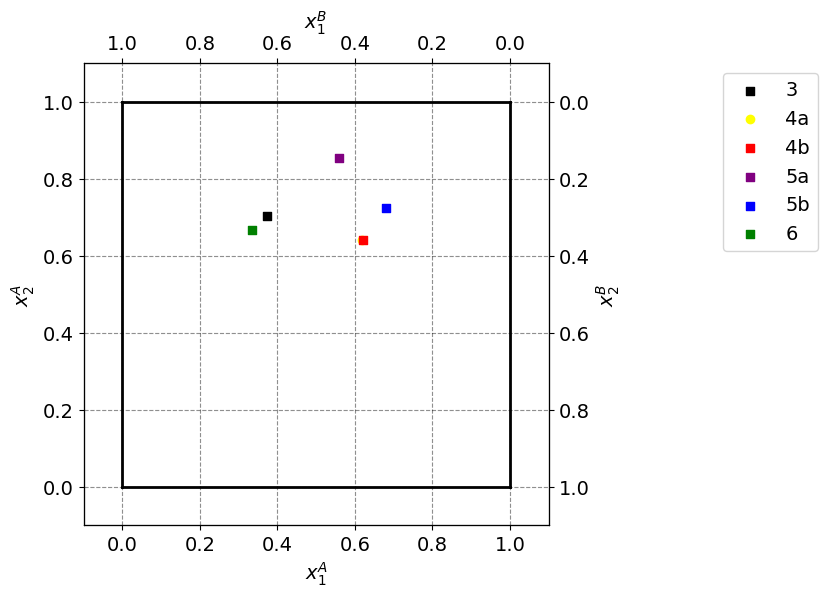

In [91]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


ax_A.scatter(allocations_list[0][0],allocations_list[0][1],marker='s',color='black', label='3')
ax_A.scatter(allocations_list[1][0],allocations_list[1][1],marker='o',color='yellow', label='4a')
ax_A.scatter(allocations_list[2][0],allocations_list[2][1],marker='s',color='red', label='4b')
ax_A.scatter(allocations_list[3][0],allocations_list[3][1],marker='s',color='purple', label='5a')
ax_A.scatter(allocations_list[4][0],allocations_list[4][1],marker='s',color='blue', label='5b')
ax_A.scatter(allocations_list[5][0],allocations_list[5][1],marker='s',color='green', label='6')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

Note that 4a and 4b are practially on top of each other

DISCUSS

# Question 7

We draw the set of random elements

In [65]:
np.random.seed(42)
W = []

for n in range(50) :
    W.append([np.random.uniform(0,1),np.random.uniform(0,1)])

print(W)

[[0.3745401188473625, 0.9507143064099162], [0.7319939418114051, 0.5986584841970366], [0.15601864044243652, 0.15599452033620265], [0.05808361216819946, 0.8661761457749352], [0.6011150117432088, 0.7080725777960455], [0.020584494295802447, 0.9699098521619943], [0.8324426408004217, 0.21233911067827616], [0.18182496720710062, 0.18340450985343382], [0.3042422429595377, 0.5247564316322378], [0.43194501864211576, 0.2912291401980419], [0.6118528947223795, 0.13949386065204183], [0.29214464853521815, 0.3663618432936917], [0.45606998421703593, 0.7851759613930136], [0.19967378215835974, 0.5142344384136116], [0.5924145688620425, 0.046450412719997725], [0.6075448519014384, 0.17052412368729153], [0.06505159298527952, 0.9488855372533332], [0.9656320330745594, 0.8083973481164611], [0.3046137691733707, 0.09767211400638387], [0.6842330265121569, 0.4401524937396013], [0.12203823484477883, 0.4951769101112702], [0.034388521115218396, 0.9093204020787821], [0.2587799816000169, 0.662522284353982], [0.3117110760

# Question 8

In [66]:
# 8:

par = model.par
saved = []

p1_guess = 1.5
p2 = 1

for w in W:
    w1A = par.w1A = w[0]
    w2A = par.w2A = w[1]
    par.w1B = 1 - w1A
    par.w2B = 1 - w2A

    model.find_equilibrium(p1_guess,p2)

    demand_1A, demand_2A = model.demand_A(model.p1_star)
    saved.append([demand_1A, demand_2A])
  



  0: p1 =   1.00000000 -> excess demand ->    -0.10841814
  1: p1 =   0.99457909 -> excess demand ->    -0.10651178
  2: p1 =   0.98925350 -> excess demand ->    -0.10461860
  3: p1 =   0.98402257 -> excess demand ->    -0.10273911
  4: p1 =   0.97888562 -> excess demand ->    -0.10087384
   ...
 25: p1 =   0.89126066 -> excess demand ->    -0.06574502
 50: p1 =   0.82836080 -> excess demand ->    -0.03594628
 75: p1 =   0.79510459 -> excess demand ->    -0.01828584
100: p1 =   0.77852185 -> excess demand ->    -0.00891596
125: p1 =   0.77052163 -> excess demand ->    -0.00425132
150: p1 =   0.76672706 -> excess demand ->    -0.00200480
175: p1 =   0.76494219 -> excess demand ->    -0.00094039
200: p1 =   0.76410597 -> excess demand ->    -0.00044000
225: p1 =   0.76371494 -> excess demand ->    -0.00020563
250: p1 =   0.76353224 -> excess demand ->    -0.00009604
275: p1 =   0.76344691 -> excess demand ->    -0.00004485
300: p1 =   0.76340707 -> excess demand ->    -0.00002094
325: p1

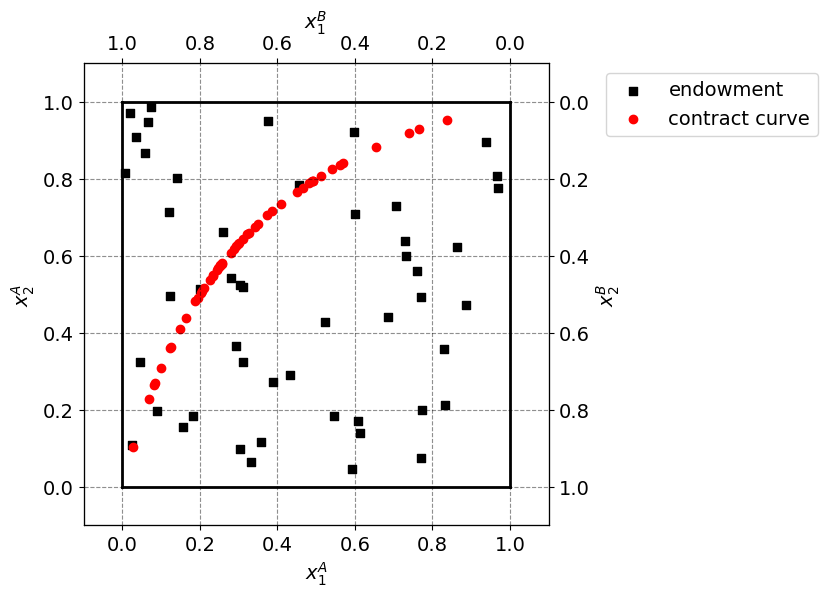

In [67]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(W[0][0],W[0][1],marker='s',color='black',label='endowment')
ax_A.scatter(saved[0][0], saved[0][1], marker='o', color='red', label='contract curve')
for endow in W[1:]:
    ax_A.scatter(endow[0],endow[1],marker='s',color='black')
for allocation in saved[1:]:
    ax_A.scatter(allocation[0], allocation[1], marker='o', color='red')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

We see that regardless of the initial endownment, the consumers will move towards the contract curve, which is a known result from micro theory. 